# Chaînes de Markov : propagation d’une épidémie dans une population
Groupe 3

**Haya MAMLOUK** - 21107689

**Maeva RAMAHATAFANDRY** - 21104443


## 1. Description du premier modèle

1. Dans le cadre de ce modèle épidémique:
- il y'a 3 états: **Sain (S), Infecté (I) et Guéri (R)**. 
- Le vecteur de probabilité initiale est de taille 3 représentant chaque état au temps 0. 
- La matrice de transition est de taille 3 x 3: on peut rentrer selon 3 états (S, I , R) et sortir selon 3 états. 

2. pi0 : vecteur de probabilité initiale:


``` python
    pi0 = [0.9, 0.1, 0.0]
```


3. Matrice de transition 1 contenant les probabilités de transition entre les différentes états:

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])
```



In [1]:
# PARAMÈTRES DU CODE
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

pi0 = [0.9, 0.1, 0.0]

A = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])


In [2]:
def est_stochastique(A):
    """
    Cette fonction renvoie 1 si A est une matrice stochastique (matrice carrée et la somme des éléments d'une ligne  = 1) et 0 sinon

    Paramètres: 
    ------------
    A : np.array
    Matrice à vérifier

    Returns:
    ------------
    boolean

    """
    sum : int = 0
    if A.shape[0] == A.shape[1]: 
        for i in A: #i = valeur ligne, j = valeur colonne
            for j in i:
                sum += j
            if sum != 1:
                return False
            else :
                sum = 0
        return True
    return False

assert(est_stochastique(A) == True)


### 1.1 Distribution théorique

#### Question 1 : Calcul de la distribution théoriques des états pour t = 1

La probabilité pour un individu d'être **sain** au temps t = 1 est:

$ P(S_1) = P(S_1 | S_0) * P(S_0) = 0.9 * 0.92 = 0.828 $


La probabilité pour un individu d'être **infecté** au temps t = 1 est: 

$   P(I_1) = P(I_1| S_0) * P(S_0) + P(I_1 | I_0) * P(I_0) = 0.08 * 0.9 + 0.93 * 0.1  = 0.072 + 0.093 = 0.165 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_1) = P(R_1 | I_0) * P(I_0) = 0.07 * 0.1 = 0.007 $



#### Question 2 : Calcul de la distribution théoriques des états pour t = 2

La probabilité pour un individu d'être **sain** au temps t = 2 est:

$   P(S_2) = P(S_2 | S_1) * P(S_1) =  0.92 * 0.828 = 0.762 $ 


La probabilité pour un individu d'être **infecté** au temps t = 2 est: 

$   P(I_2) = P(I_2| S_1) * P(S_1) + P(I_2 | I_1) * P(I_1) = 0.08 * 0.828 + 0.93 * 0.165 = 0.06624 + 0.15345 = 0.21969 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_2) = P(R_2| I_1) * P(I_1) + P(R_2 | R_1) * P(R_1) = 0.07 * 0.165 + 0.007 * 1 = 0.01855 $


#### Question 3: Calcul des distributions théoriques des états pour t entre 1 et 200

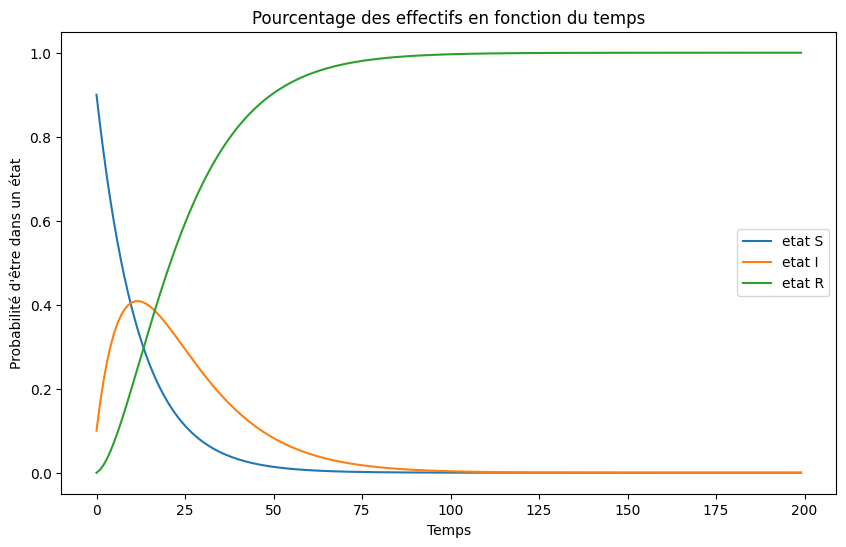

In [3]:
def distribution_etat(A, vect_init):
    liste_distribution = []
    liste_distribution.append(np.array(vect_init))

    for i in range(1, 200): 
        liste_distribution.append(np.dot(liste_distribution[i-1], A))

    return liste_distribution

def affichage_distribution(liste_distribution) :
    #affichage (to review bc copier coller from chatgpt)
    time_steps = np.arange(len(liste_distribution))
    state_labels = ['etat S', 'etat I', 'etat R']
    plt.figure(figsize=(10, 6))
    for state_index in range(len(liste_distribution[0])):
        state_probabilities = [distribution[state_index] for distribution in liste_distribution]
        plt.plot(time_steps, state_probabilities, label=state_labels[state_index])

    plt.title('Pourcentage des effectifs en fonction du temps')
    plt.xlabel('Temps')
    plt.ylabel("Probabilité d'être dans un état")
    plt.legend()
    plt.show()

liste_distribution = distribution_etat(A, pi0)
affichage_distribution(liste_distribution)

### 1.2 Distibution Observée
#### 1.2.1 Tirage aléatoire des états

In [4]:
def seq_alea_individu(T, pi0, transition) :

    states  = ['S', 'I', 'R']
    res = [random.choices(states, weights=pi0, k=1)[0]]

    transition_weights = {'S': transition[0], 'I': transition[1], 'R': transition[2]}

    for i in range(1, T + 1):
        current_state = res[i - 1]
        next_state = random.choices(states, weights=transition_weights[current_state], k=1)[0]
        res.append(next_state)
    return res
    
seq_alea_individu(150, pi0, A)

['S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

#### 1.2.2 Modélisation d’une population
##### Question 1 : Nombre d'individus sains, infectés et guéris et répartition de la population

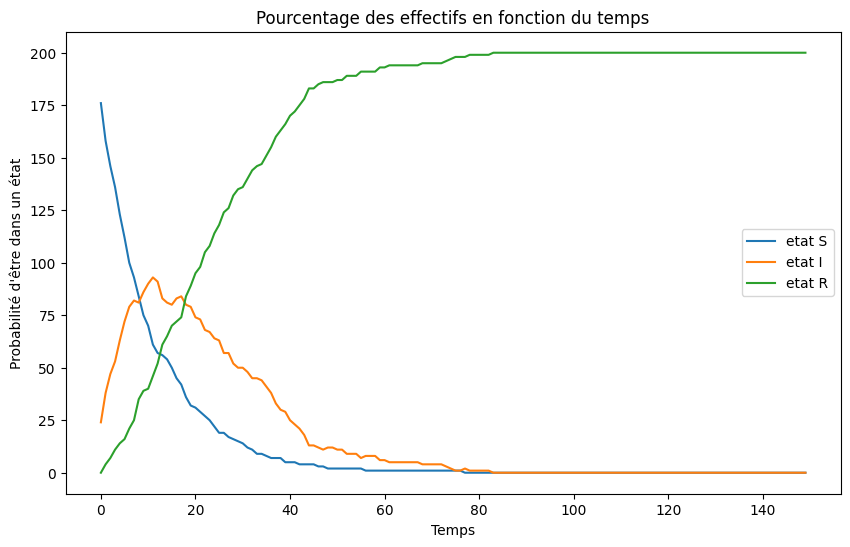

In [5]:
def seq_alea_population(nb_individus, temps, pi0, A):
    res = []
    for i in range(nb_individus+1):
        res.append(seq_alea_individu(temps, pi0, A))
    return res

def distribution_population(seq_population : list(list()), temps, nb_individus):
    res = []

    for j in range(temps):
        tab_temps = np.zeros(3)
        for i in range(nb_individus):
            if seq_population[i][j] == 'S':
                tab_temps[0] += 1
            elif seq_population[i][j] == 'I':
                tab_temps[1] += 1
            else:
                tab_temps[2] += 1
        res.append(tab_temps)
        
    return res

#tests
population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
affichage_distribution(distribution)

##### Question 2: Affichage des pourcentages

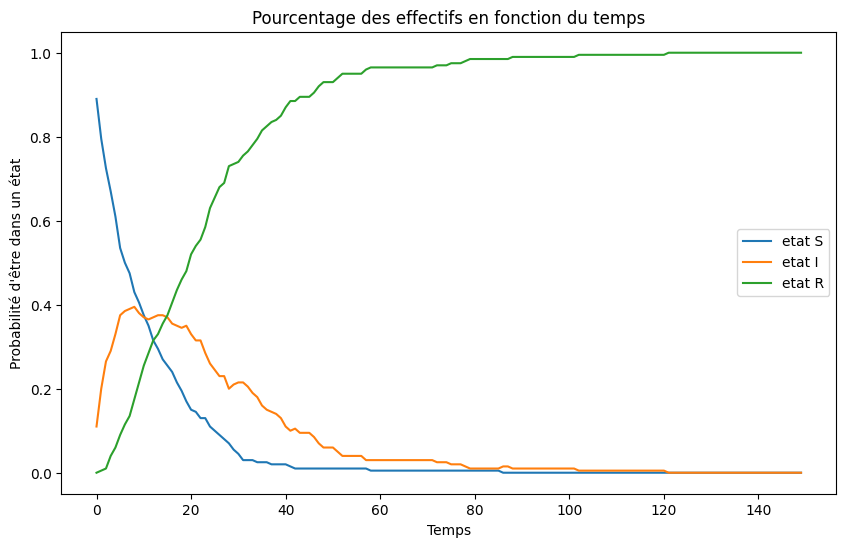

In [6]:
def pourcentages_population(repartition_population, nb_individus):
    for temps in repartition_population:
        for i in range(3):
            temps[i] /= nb_individus
    return repartition_population

population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
pourcentages = pourcentages_population(distribution, 200)
affichage_distribution(pourcentages)

##### Question 3
Quand t est très grand, la globalité de la population converge vers R: le nombre d'individus sains et infectés se rapprochent de 0% et le pourcentage d'invividus guéris se rapprochent de 100%. R est un état récurrent.

##### Question 4: expérience avec une population de 5 individus et 5000

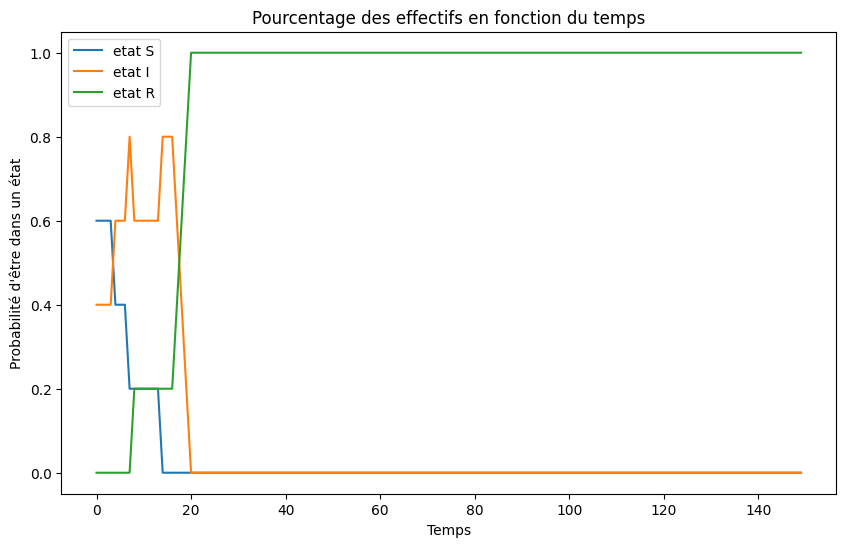

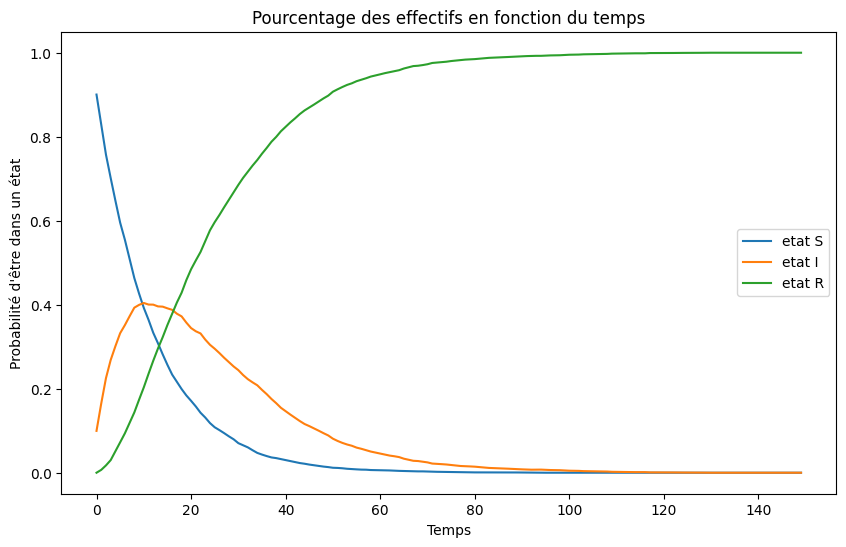

In [7]:
def experience(nb_individus, temps):
    population = seq_alea_population(nb_individus, temps, pi0, A)
    distribution = distribution_population(population, temps, nb_individus)
    pourcentages = pourcentages_population(distribution, nb_individus)
    return pourcentages

# avec 5 individus:
affichage_distribution(experience(5, 150))

# avec 5000 individus
affichage_distribution(experience(5000, 150))

## 1.3 Longueur de l'infection
##### Question 1: Longueur moyenne d'une séquence de I

In [21]:
def longueur_I_obs(temps, nb_individus):
    I_moyen = []
    pop = seq_alea_population(nb_individus, temps, pi0, A)
    
    for i in range(nb_individus):
        total_inf = 0 
        for j in range(temps):
            seq_inf = [etat for etat in pop[i][j] if etat == 'I']
            inf = len(seq_inf)
            total_inf += inf  #nb seq 'I' pour chaque individu
       
        I_moyen.append(total_inf)  

    return statistics.mean(I_moyen)

longueur_I_obs(150, 200)
    
    

14.535

##### Question 2: Longueur théorique d'une séquence I
La longueur théorique d'une séquence I peut être modélisée par une loi géométrique tel que la probabilité de succès est associée à la probabilité de passer de I à R.
Soit L une variable aléatoire représentant la longueur d'une séquence, donc le nombre de I dans une séquence.
P(L=1) = P(R|I) = 0.07 (être infecté une seule fois) 
P(L=2) = P(I|I) x P(R|I) = 0.93 x 0.07 (être infecté deux fois de suite)
P(L=3) = $P(I|I)^2$ x P(R|I) = $0.93^2$ x 0.07 (être infecté deux fois de suite)
P(L=k) = $P(I|I)^{k-1} $ x P(R|I) = $0.93^{k-1}$ x 0.07 (être infecté k fois de suite)

Pour chercher la moyenne de la longueur théorique, on calcule donc l'espérance de la loi géométrique de paramètres 0.07, comme le probabilité de succes, passer de I à R, est de 0.07 .
$Longueur moyenne = 1/0.07 = 14.28$

##### Question 3: Comparaison de la longueur moyenne observée et de la longueur moyenne​ théorique
On peut remarquer que la longueur moyenne observée et la longueur moyenne théorique se rapprochent avec une petite différence , la valeur observée environant 14 et la valeur théorique 14.28.
##### Question 4: Distribution observée de la longueur d'infection

[17 12 16  9  9 23  7 10  7  5  7  6  2  2  8  5  2  5  4  3  2  5  1  2
  2  3  3  1  1  1  1  1  2  2  4  1  1  2  1  1  1  1  1  1  1]
[0.08457711 0.05970149 0.07960199 0.04477612 0.04477612 0.11442786
 0.03482587 0.04975124 0.03482587 0.02487562 0.03482587 0.02985075
 0.00995025 0.00995025 0.039801   0.02487562 0.00995025 0.02487562
 0.0199005  0.01492537 0.00995025 0.02487562 0.00497512 0.00995025
 0.00995025 0.01492537 0.01492537 0.00497512 0.00497512 0.00497512
 0.00497512 0.00497512 0.00995025 0.00995025 0.0199005  0.00497512
 0.00497512 0.00995025 0.00497512 0.00497512 0.00497512 0.00497512
 0.00497512 0.00497512 0.00497512]


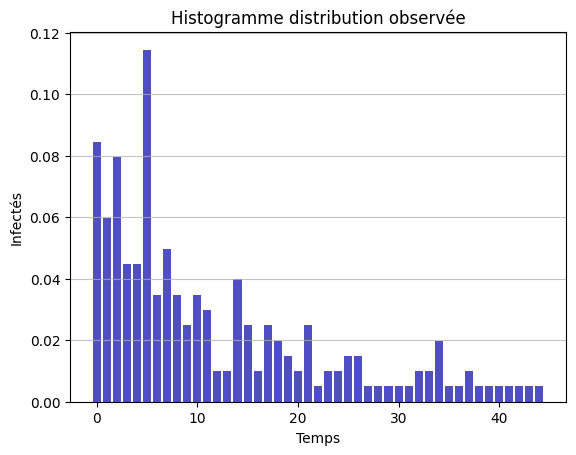

In [32]:
def longueur_by_time(temps, nb_individus):
    # population observée
    pop = seq_alea_population(nb_individus, temps, pi0, A)

    # compter occurence de I pour chaque individu
    occurrences = [ind.count('I') for ind in pop]

    val_unique, cpt = np.unique(occurrences, return_counts=True)
    dist = cpt / len(occurrences)
    res = np.column_stack((val_unique, dist))

    return res


def histogramme(longueur_list):
    plt.bar(range(len(longueur_list)), longueur_list, color='#0504aa', alpha=0.7)
    plt.title('Histogramme distribution observée')
    plt.xlabel('Temps')
    plt.ylabel('Infectés')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

list = longueur_by_time(150, 200)
print(list)
histogramme(list)


##### Question 5: Distribution théorique et distribution observée

1. Courbe théorique

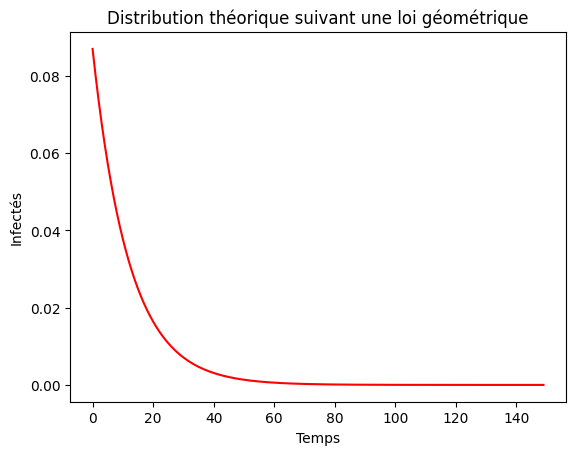

In [11]:
def geometrique(p, k):
    return (1 - p)**(k - 1) * p

def distribution_th(temps, p):
    return [geometrique(p,k) for k in range(temps)]

def courbe_dist_theorique(list_distribution):
    x = np.arange(len(list_distribution))
    y = list_distribution
    plt.plot(x, y, color='red')

    plt.title('Distribution théorique suivant une loi géométrique')
    plt.xlabel('Temps')
    plt.ylabel("Infectés")
    plt.show()

dist_th = distribution_th(150, 0.08)
courbe_dist_theorique(dist_th) 
    

2. Comparaison des distributions

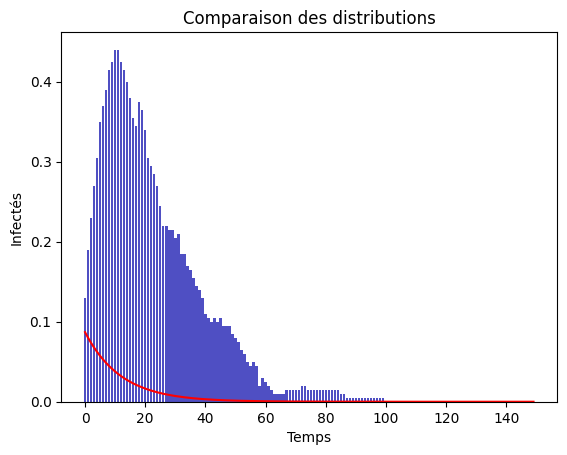

In [12]:
def comp_distributions(list_theorique, list_observee):

    # affichage de l'histogramme de la distribution observee
    plt.bar(range(len(list_observee)), list_observee, color='#0504aa', alpha=0.7)

    #affichage de l'histogramme de la distribution theorique
    plt.plot(np.arange(len(list_theorique)), list_theorique, color='red')

    #légendes
    plt.title('Comparaison des distributions')
    plt.xlabel('Temps')
    plt.ylabel("Infectés")
    plt.show()

list_th = distribution_th(150, 0.08)
list_obs = longueur_by_time(150, 200)
comp_distributions(list_th, list_obs)